In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
from matplotlib.patches import Rectangle, ConnectionPatch, Arc

## Main Function for Plotting Tennis Court

In [6]:
#Tennis court

def draw_pitch(ax,from_court):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 36, height = 78, fill = False,color='black')
    #Left, Right Penalty Area and midline
    TopLeftServiceBox = Rectangle([4.5,39], width = 13.5, height = 21, fill = False,color='black')
    TopRightServiceBox = Rectangle([18,39], width = 13.5, height = 21, fill = False,color='black')
    
    BotLeftServiceBox = Rectangle([4.5,18], width = 13.5, height = 21, fill = False,color='black')
    BotRightServiceBox = Rectangle([18,18], width = 13.5, height = 21, fill = False,color='black')
    
    # RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([0,39], [36,39], "data", "data",color='black')
    
    #optional
    serviceLine = ConnectionPatch([4.5,18], [31.5,18], "data", "data",color='black')
    
    leftSinglesSideline = ConnectionPatch([4.5,78], [4.5,0], "data", "data",color='black')
    rightSinglesSideline = ConnectionPatch([31.5,78], [31.5,0], "data", "data",color='black')

    from_coords = {
    'deuce court':[26,30],
    'middle court':[18,30],
    'ad court':[10,30] }
    x = from_coords[from_court][0]
    y = from_coords[from_court][1]
    
    circle = plt.Circle((x,y),2,color="black", fill = True)      #10, 18, 26    
    
    element = [Pitch, TopLeftServiceBox, TopRightServiceBox, BotLeftServiceBox, BotRightServiceBox, serviceLine, midline, leftSinglesSideline, rightSinglesSideline,circle]
    for i in element:
        ax.add_patch(i)

In [7]:
# data_133['Shot_Type_'].unique()
# data_133['From_Court'].unique()

# data_133 = data_133[(data_133['Player 1 name']=='Roger Federer') & (data_133['Player 2 name'].str.contains('Rafael Nadal'))]

## Main Helper Function

In [8]:
#load raw data from feature_engineering notebook
%store -r data
%store -r data_133

#load all clusters from sports_analytics_v5 notebook
%store -r serve_cluster_agglom
%store -r return_cluster_agglom
%store -r rally_cluster_agglom

In [9]:
# # data_133.head()
# data_133 = data[(data['Player 1 name']=='Roger Federer') & (data['Player 2 name']=='Rafael Nadal')]
# data_133 = data_133[(data_133['Player 1 name']=='Roger Federer') & (data_133['Player 2 name']=='Rafael Nadal') & (data_133['Date'].contains(2017))]
# data_133.head()

In [10]:
# data_133['to_court_location']
data_133.head()

Short,Player 1 name,Player 2 name,Player 1 handness,Player 2 handness,Player 1 points,Player 2 points,Player 1 games,Player 2 games,Player 1 sets,Player 2 sets,Date,Tournament Name,Shot Type,From which court,Shot,Direction,To which court,Depth,Touched Net?,Hit at what depth?,Approach shot?,Shot outcome,Fault type,Prev Shot Type,Prev shot From which court,Prev Shot,Prev shot Direction,Prev shot To which court,Prev shot Depth,Prev shot Touched Net?,Prev shot Hit at what depth?,Prev shot Approach shot?,Prev Shot outcome,Prev shot Fault type,Prev prev Shot Type,Prev prev shot From which court,Prev prev Shot,Prev prev shot Direction,Prev prev shot To which court,Prev prev shot Depth,Prev prev shot Touched Net?,Prev prev shot Hit at what depth?,Prev prev shot Approach shot?,Prev prev Shot outcome,Prev prev shot Fault type,Shot_,Direction_,Shot_Type_,Shot_Outcome_,Shot_Outcome_group,From_Court,direction_outcome,To which court_,shot_group,Year,match,direction_2,rally_outcome,return_direction_outcome,outcome_basic,return_direction_outcome_2,serveDirection_outcome_basic
0,Novak Djokovic,Alexander Zverev,RH,RH,0,0,0,0,0,0,2018-11-18,Tour_Finals,1,1,99,6,2,99,2,99,2,7,7,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,unknown shot,server to T,1st serve,no outcome,no outcome,deuce court,server to T-no outcome,middle court,other,2018,0 2018-11-18\n1 2018-11-18\n2 ...,down_mid,-,middle court-no outcome,over,middle court-over,server to T-over
1,Alexander Zverev,Novak Djokovic,RH,RH,0,0,0,0,0,0,2018-11-18,Tour_Finals,3,2,22,2,2,2,2,99,2,7,7,1,1,99,6,2,99,2,99,2,7,7,99,99,99,99,99,99,99,99,99,99,99,backhand,middle court,return,no outcome,no outcome,middle court,middle court-no outcome,middle court,backhand,2018,0 2018-11-18\n1 2018-11-18\n2 ...,down_mid,BH_down_mid,middle court-no outcome,over,middle court-over,middle court-over
2,Novak Djokovic,Alexander Zverev,RH,RH,0,0,0,0,0,0,2018-11-18,Tour_Finals,4,2,1,7,1,99,2,99,2,7,7,3,2,22,2,2,2,2,99,2,7,7,1,1,99,6,2,99,2,99,2,7,7,forehand,7,rally,no outcome,no outcome,middle court,7-no outcome,deuce court,forehand,2018,0 2018-11-18\n1 2018-11-18\n2 ...,cross_court,FH_cross_court,deuce court-no outcome,over,deuce court-over,7-over
3,Alexander Zverev,Novak Djokovic,RH,RH,0,0,0,0,0,0,2018-11-18,Tour_Finals,4,1,1,2,2,99,2,99,2,7,7,4,2,1,7,1,99,2,99,2,7,7,3,2,22,2,2,2,2,99,2,7,7,forehand,middle court,rally,no outcome,no outcome,deuce court,middle court-no outcome,middle court,forehand,2018,0 2018-11-18\n1 2018-11-18\n2 ...,down_mid,FH_down_mid,middle court-no outcome,over,middle court-over,middle court-over
4,Novak Djokovic,Alexander Zverev,RH,RH,0,0,0,0,0,0,2018-11-18,Tour_Finals,4,2,1,2,2,99,2,99,2,4,3,4,1,1,2,2,99,2,99,2,7,7,4,2,1,7,1,99,2,99,2,7,7,forehand,middle court,rally,unforced error,error,middle court,middle court-error,middle court,forehand,2018,0 2018-11-18\n1 2018-11-18\n2 ...,down_mid,FH_Error,middle court-unforced error,not over,middle court-not over,middle court-not over


In [11]:
#Adding approx discretized coordinates to shot locations:

def to_shot_location(to_court):
    to_court_dict = {
    'deuce court':[10,50],
    'middle court':[18,50],
    'ad court':[26,50],
    'unknown':'unknown'
    }
    # to_court_dict = {
    # 'deuce court':[random.randint(8,12),random.randint(48,52)],
    # 'middle court':[random.randint(16,20),random.randint(48,52)],
    # 'ad court':[random.randint(24,28),random.randint(48,52)],
    # 'unknown':'unknown'
    # }    
    res = to_court_dict[to_court]
    # res = [random.randint(5,30),random.randint(30,70)]
    return res

def from_shot_location(from_court):
    from_court_dict = {
    'deuce court':[26,30],
    'middle court':[18,30],
    'ad court':[10,30],
    'unknown':'unknown'
    }
    res = from_court_dict[from_court]
    # res = [random.randint(5,30),random.randint(30,70)]
    return res

data_133 = data_133.drop(data_133.index[data_133["To which court_"]=='unknown'])
data_133 = data_133.drop(data_133.index[data_133["From_Court"]=='unknown'])

data_133['to_court_location']=data_133['To which court_'].apply(to_shot_location)
data_133['from_court_location']=data_133['From_Court'].apply(from_shot_location)

In [12]:
# cluster = list(serve_cluster_agglom[serve_cluster_agglom["Return Cluster"]==1]["Player"])
# data_133[data_133['Player 1 name'].isin(cluster)]
# data_133[(data_133['Player 1 name'].str.contains("Roger Federer"))]
# serve_cluster_agglom

serve_cluster_agglom[serve_cluster_agglom["Player"]=="Roger Federer"]["Return Cluster"].iloc[0]

3

In [13]:
#Heatmap DF Function, for plotting

# data_133 = data_133[(data_133['Player 1 name']=='Roger Federer') & (data_133['Player 2 name']=='Rafael Nadal')].groupby('Date').count()

def create_heatmap_df(player,shot_type,from_court,cluster=False):

    if cluster==False:
        player_df = data_133[(data_133['Player 1 name'].str.contains(player)) & (data_133['Shot_Type_']== shot_type) & (data_133['From_Court']==from_court)]
        player_df = player_df.drop(player_df.index[player_df["to_court_location"]=='unknown'])
    elif cluster==True:
        if shot_type in ["1st serve","2nd serve"]:
            cluster_df = serve_cluster_agglom
        elif shot_type=="return":
            cluster_df = return_cluster_agglom
        elif shot_type=="rally":
            cluster_df = rally_cluster_agglom
        else:
            print("game_component not specified correctly.")
            return
        cluster_no = cluster_df[cluster_df["Player"].str.contains(player)]["Return Cluster"].iloc[0]
        cluster_players = list(cluster_df[cluster_df["Return Cluster"]==cluster_no]["Player"])
        
        player_df = data_133[data_133['Player 1 name'].isin(cluster_players)]

    lst =[]
    for i,v in enumerate(player_df['to_court_location'].value_counts()):
        item = ([player_df['to_court_location'].value_counts().index[i][1],player_df['to_court_location'].value_counts().index[i][0],player_df['to_court_location'].value_counts()[i]])
        lst.append(item)

    hm_df = pd.DataFrame(lst,columns=['Yrows','Xcols','count'])
    hm_df['percent'] = round((hm_df['count'] / 
                      hm_df['count'].sum()) * 100,1)
    # hm_df["court"] = hm_df.apply(lambda x: x)
    hm_df['court'] = hm_df.apply(lambda row: "mid" if row["Xcols"]==18 else "deuce" if row["Xcols"]==10 else "ad" if row["Xcols"]==26 else "error", axis=1)
    return hm_df

In [14]:
create_heatmap_df('Federer','return','deuce court',cluster=True)

,Yrows,Xcols,count,percent,court
0,50,26,136578,36.6,ad
1,50,18,130291,35.0,mid
2,50,10,105892,28.4,deuce


In [15]:
create_heatmap_df('Federer','return','deuce court',cluster=False)

,Yrows,Xcols,count,percent,court
0,50,18,4678,58.5,mid
1,50,26,1668,20.9,ad
2,50,10,1647,20.6,deuce


## Main Plot Function

Djokovic
   court   count  percent
0     ad  224300     37.1
1    mid  203737     33.7
2  deuce  176035     29.1
Nadal
   court   count  percent
0     ad  224300     37.1
1    mid  203737     33.7
2  deuce  176035     29.1
Federer
   court   count  percent
0     ad  136578     36.6
1    mid  130291     35.0
2  deuce  105892     28.4


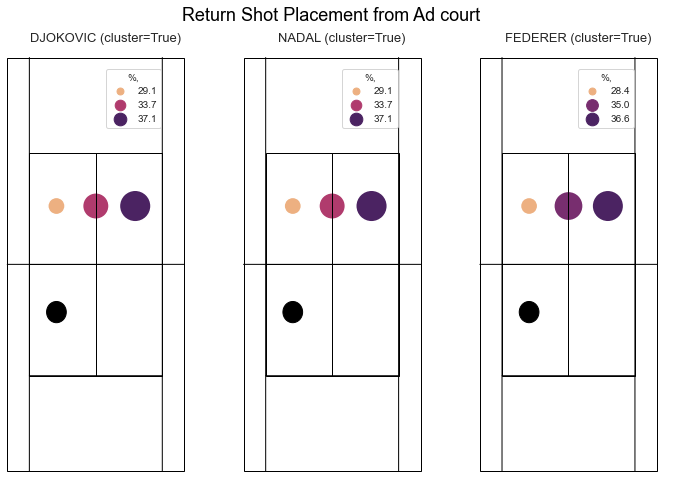

In [16]:
#Set 3 variables, and then run the cell to get the shot charts

players = ["Djokovic","Nadal","Federer"]
shot_type = "return"
from_court = "ad court"
cluster=True
# game_component=None

# shot_type: ['1st serve', 'return', 'rally', '2nd serve']
# from_court: ['deuce court', 'middle court', 'ad court']

plt.figure(figsize=(4*len(players), 8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(f"{shot_type.capitalize()} Shot Placement from {from_court.capitalize()}", fontsize=18, y=0.95)
sns.set_style("white")
# sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})    

# loop through the length of tickers and keep track of index
for n, player in enumerate(players):

    df = create_heatmap_df(player,shot_type.lower(),from_court.lower(),cluster=cluster)
    print(player)
    print(df[["court","count","percent"]])
    # add a new subplot iteratively
    ax = plt.subplot(1, len(players), n + 1)

    #draw player heatmap
    # sns.scatterplot(data=df, x="Xcols", y="Yrows",hue="percent",cmap='crest',palette="flare",s=2000,ax=ax,size='percent')
    # sns.scatterplot(data=df, x="Xcols", y="Yrows",hue="percent",cmap='crest',palette="flare",size='percent',s=2000,ax=ax)    
    sns.scatterplot(data=df, x="Xcols", y="Yrows",hue="percent",cmap='crest',palette="flare",size='percent',s=100,ax=ax,sizes=(300,1000))
    # sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})    
     
    ax.set_ylim(-2, 80)
    ax.set_xlim(0, 40)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    ax.set_title(f"{player.upper()} (cluster={cluster})",fontsize=13)
    # ax.get_legend().remove()
    ax.set_xlabel("")
    
    #draw tennis court~~
    draw_pitch(ax,from_court.lower())
    ax.legend(bbox_to_anchor=(.5, .95), loc='upper left', borderaxespad=0,markerscale=0.4,title='%,')
    

## Improvement Ideas: 
- make a consistent color scale across all charts (1 legend / color scale)
- use color scale (for continuous scale) instead of legend with discrete values
- use SIZE instead of color for points

---

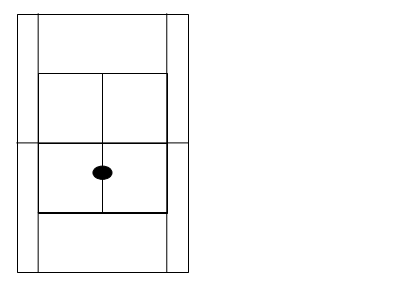

In [17]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax,'middle court') #overlay our different objects on the pitch
plt.ylim(-2, 80)
plt.xlim(-2, 80)
plt.axis('off')

plt.show()

In [20]:
import random

In [21]:
def to_shot_location(to_court):
    to_court_dict = {
    'deuce court':[10,50],
    'middle court':[18,50],
    'ad court':[26,50],
    'unknown':'unknown'
    }
    # to_court_dict = {
    # 'deuce court':[random.randint(8,12),random.randint(48,52)],
    # 'middle court':[random.randint(16,20),random.randint(48,52)],
    # 'ad court':[random.randint(24,28),random.randint(48,52)],
    # 'unknown':'unknown'
    # }    
    res = to_court_dict[to_court]
    # res = [random.randint(5,30),random.randint(30,70)]
    return res

def from_shot_location(from_court):
    from_court_dict = {
    'deuce court':[26,30],
    'middle court':[18,30],
    'ad court':[10,30],
    'unknown':'unknown'
    }
    res = from_court_dict[from_court]
    # res = [random.randint(5,30),random.randint(30,70)]
    return res

data_133 = data_133.drop(data_133.index[data_133["To which court_"]=='unknown'])
data_133 = data_133.drop(data_133.index[data_133["From_Court"]=='unknown'])

data_133['to_court_location']=data_133['To which court_'].apply(to_shot_location)
data_133['from_court_location']=data_133['From_Court'].apply(from_shot_location)

----